In [63]:
# Quantitative Marketing
# Assignment 1 - Avazu Kaggle competition

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split


In [2]:
# here we try to get a feel of the data set and model the first piece of it
data = pd.read_csv("train.csv", nrows=100000)

In [3]:
data.describe()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,1.000000e+05,100000.000000,100000.0,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,9.500813e+18,0.174900,14102100.0,1005.034410,0.19830,1.055730,0.199270,17682.145900,318.333960,56.818920,1964.034380,0.789350,131.734480,37874.227610,88.555670
std,5.669410e+18,0.379883,0.0,1.088741,0.40264,0.583993,0.635268,3237.735265,11.931939,36.924104,394.962696,1.223761,244.076787,48546.274316,45.482841
min,3.237563e+13,0.000000,14102100.0,1001.000000,0.00000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,13.000000
25%,4.183340e+18,0.000000,14102100.0,1005.000000,0.00000,1.000000,0.000000,15704.000000,320.000000,50.000000,1722.000000,0.000000,35.000000,-1.000000,61.000000
50%,1.074496e+19,0.000000,14102100.0,1005.000000,0.00000,1.000000,0.000000,17654.000000,320.000000,50.000000,1993.000000,0.000000,35.000000,-1.000000,79.000000
75%,1.457542e+19,0.000000,14102100.0,1005.000000,0.00000,1.000000,0.000000,20362.000000,320.000000,50.000000,2306.000000,2.000000,39.000000,100083.000000,156.000000
max,1.844670e+19,1.000000,14102100.0,1010.000000,5.00000,5.000000,5.000000,21705.000000,728.000000,480.000000,2497.000000,3.000000,1835.000000,100248.000000,157.000000


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
id                  100000 non-null float64
click               100000 non-null int64
hour                100000 non-null int64
C1                  100000 non-null int64
banner_pos          100000 non-null int64
site_id             100000 non-null object
site_domain         100000 non-null object
site_category       100000 non-null object
app_id              100000 non-null object
app_domain          100000 non-null object
app_category        100000 non-null object
device_id           100000 non-null object
device_ip           100000 non-null object
device_model        100000 non-null object
device_type         100000 non-null int64
device_conn_type    100000 non-null int64
C14                 100000 non-null int64
C15                 100000 non-null int64
C16                 100000 non-null int64
C17                 100000 non-null int64
C18                 100000 non-null int

In [5]:
# data.iloc[:10, 4:]

le = LabelEncoder()

for i in range(5, 14):
    le.fit(data.iloc[:, i].unique())
    data.iloc[:, i] = le.transform(data.iloc[:, i])
    

data.loc[:, 'C20'] = data.loc[:, 'C20'] + 1

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
id                  100000 non-null float64
click               100000 non-null int64
hour                100000 non-null int64
C1                  100000 non-null int64
banner_pos          100000 non-null int64
site_id             100000 non-null int64
site_domain         100000 non-null int64
site_category       100000 non-null int64
app_id              100000 non-null int64
app_domain          100000 non-null int64
app_category        100000 non-null int64
device_id           100000 non-null int64
device_ip           100000 non-null int64
device_model        100000 non-null int64
device_type         100000 non-null int64
device_conn_type    100000 non-null int64
C14                 100000 non-null int64
C15                 100000 non-null int64
C16                 100000 non-null int64
C17                 100000 non-null int64
C18                 100000 non-null int64
C19   

In [6]:
print(data.head())


             id  click      hour    C1  banner_pos  site_id  site_domain  \
0  1.000009e+18      0  14102100  1005           0      104          742   
1  1.000017e+19      0  14102100  1005           0      104          742   
2  1.000037e+19      0  14102100  1005           0      104          742   
3  1.000064e+19      0  14102100  1005           0      104          742   
4  1.000068e+19      0  14102100  1005           1      881          439   

   site_category  app_id  app_domain ...   device_type  device_conn_type  \
0              2     656          23 ...             1                 2   
1              2     656          23 ...             1                 0   
2              2     656          23 ...             1                 0   
3              2     656          23 ...             1                 0   
4              0     656          23 ...             1                 0   

     C14  C15  C16   C17  C18  C19     C20  C21  
0  15706  320   50  1722    0   35  

In [7]:
print(data.hour.unique())

[14102100]


In [33]:
# trying out code for the loop
data.loc[:5, 'site_id':'device_model'].keys()

for i in data.loc[:5, 'site_id':'device_model'].keys():
    print(i, type(i))

site_id <class 'str'>
site_domain <class 'str'>
site_category <class 'str'>
app_id <class 'str'>
app_domain <class 'str'>
app_category <class 'str'>
device_id <class 'str'>
device_ip <class 'str'>
device_model <class 'str'>


In [8]:
data.loc[:10, 'site_id']

0     104
1     104
2     104
3     104
4     881
5     734
6     514
7     775
8     104
9     471
10    775
Name: site_id, dtype: int64

In [9]:
train, test = train_test_split(data, test_size=0.2)

In [10]:
print(train.shape)
print(test.shape)

(80000, 24)
(20000, 24)


In [11]:
model = GaussianNB(priors=[0.9, 0.1])
fit = model.fit(X=train.iloc[:, 2:], y=train.iloc[:, 1])


In [12]:
fit.get_params()

{'priors': [0.9, 0.1]}

In [13]:
pred = fit.predict_proba(test.iloc[:, 2:])
print(pred[:10])
print(pred.shape)

[[  9.64361889e-01   3.56381108e-02]
 [  8.79363519e-01   1.20636481e-01]
 [  9.99180974e-01   8.19025873e-04]
 [  9.98630971e-01   1.36902920e-03]
 [  8.78375764e-01   1.21624236e-01]
 [  9.99917666e-01   8.23341785e-05]
 [  9.99342504e-01   6.57496371e-04]
 [  9.80616556e-01   1.93834437e-02]
 [  8.66609723e-01   1.33390277e-01]
 [  9.99999380e-01   6.19634590e-07]]
(20000, 2)


In [14]:
print(np.mean(train.iloc[:, 1]))
print(np.mean(test.iloc[:, 1]))
print(np.mean(pred[:, 1] > 0.5))
print(np.mean(pred[:, 1]))

0.1758
0.1713
0.07055
0.155068454469


In [89]:
# now we set up the iteration and model the entire dataset
chunk_iter = pd.read_csv("trainshuf.csv", chunksize=10 ** 5, names=['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', \
                                                                      'site_domain', 'site_category', 'app_id','app_domain', \
                                                                      'app_category', 'device_id', 'device_ip', \
                                                                      'device_model', 'device_type', 'device_conn_type', \
                                                                      'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'])

nb_train = BernoulliNB() # we are using prior that we have taken from the previous step
le = LabelEncoder()

In [90]:
# to get these values we need to change the for loop
results = pd.DataFrame(np.zeros((5 * 43, 2)), columns=['current test CTR', 'predicted CTR'])


In [37]:
#dictionaries for splitting the dataset into chunks
df = {}
for i in range(1, 46):
    df["train{0}".format(i)] = chunk_iter.get_chunk()


In [38]:
df.keys()

dict_keys(['train1', 'train2', 'train3', 'train4', 'train5', 'train6', 'train7', 'train8', 'train9', 'train10', 'train11', 'train12', 'train13', 'train14', 'train15', 'train16', 'train17', 'train18', 'train19', 'train20', 'train21', 'train22', 'train23', 'train24', 'train25', 'train26', 'train27', 'train28', 'train29', 'train30', 'train31', 'train32', 'train33', 'train34', 'train35', 'train36', 'train37', 'train38', 'train39', 'train40', 'train41', 'train42', 'train43', 'train44', 'train45'])

In [39]:
df['train1'].head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
4500000,5442790879654577636,0,14102900,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,...,1,0,19016,300,250,2162,2,39,-1,33
4500001,4610423314720951655,0,14102608,1005,1,5b4d2eda,16a36ef3,f028772b,ecad2386,7801e8d9,...,1,0,16208,320,50,1800,3,167,100079,23
4500002,3081705014542412734,1,14102115,1005,0,85f751fd,c4e18dd6,50e219e0,57242099,2347f47a,...,1,0,19775,320,50,2229,0,687,100031,48
4500003,18247618770425710668,1,14102920,1005,0,85f751fd,c4e18dd6,50e219e0,1929ea63,2347f47a,...,1,3,377,320,50,112,3,1319,-1,15
4500004,8811029942841527337,0,14102315,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15708,320,50,1722,0,35,-1,79


In [40]:
# after we load the chunks we need to change the variable types
    
for j in range(1, 46):
    
    d = df["train{0}".format(j)]
    d = d.drop('id', axis=1)
    d = d.drop('C1', axis=1)
    d = d.drop('C14', axis=1)
    hours = [str(k)[-2:] for k in d['hour']]
    d['hours_clean'] = hours
    d = d.drop('hour', axis=1)
    d.loc[:, 'C20'] = d.loc[:, 'C20'] + 1 # there are values -1 and those are not allowed in NB
    
    for k in d.loc[:, 'site_id':'device_model'].keys():
        le.fit(d.loc[:, k].unique())
        d.loc[:, k] = le.transform(d.loc[:, k])
    
    df["train{0}".format(j)] = d
    
    print(j)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45


In [41]:
test = df['train45']
test.head()

,click,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,...,device_type,device_conn_type,C15,C16,C17,C18,C19,C20,C21,hours_clean
8900000,0,1,1257,648,17,1235,40,0,11171,23175,...,1,0,320,50,2374,3,39,0,23,06
8900001,0,0,756,1014,5,757,64,2,11171,55084,...,1,3,320,50,2424,1,161,100191,71,21
8900002,0,1,391,202,1,1235,40,0,11171,45634,...,1,0,320,50,1722,0,35,0,79,04
8900003,0,0,756,1014,5,522,36,2,8703,60255,...,1,0,300,50,2507,0,35,0,157,09
8900004,0,0,236,784,3,1235,40,0,11171,76273,...,1,0,320,50,2717,2,47,0,23,15


In [60]:
enc = OneHotEncoder(categorical_features='all', dtype='int64',
       handle_unknown='error', n_values='auto', sparse=True)

for j in range(1, 46):
    d = df["train{0}".format(j)]
    
    for k in d.keys():
        le.fit(d.loc[:, k].unique())
        d.loc[:, k] = le.transform(d.loc[:, k])
        
    df["train{0}".format(j)] = d

In [101]:
%%timeit
# our actual calculation
for j in range(0, 5):
    for i in range(1, 44):
        g = np.random.randint(low = 1, high = 44)
        d = df["train{0}".format(g)]

        print(i)

        # then we fit the Naive Bayes
        fit_train = nb_train.partial_fit(X=d.iloc[:, 1:], y = d.iloc[:, 0], classes=[0, 1])
        pred_full = fit_train.predict_proba(test.iloc[:, 1:])

        results.iloc[j * 43 + (i - 1), :] = ([np.mean(test.iloc[:, 0]), np.mean(pred_full[:, 1])])


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
1

   current test CTR  predicted CTR
0           0.16919       0.173509
1           0.16919       0.173113
2           0.16919       0.173002
3           0.16919       0.172756
4           0.16919       0.172877


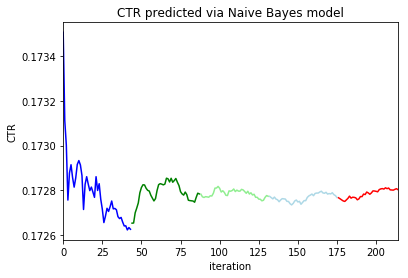

In [100]:
print(results.head())
results.iloc[:44, 1].plot(c = 'blue')
results.iloc[44:88, 1].plot(c = 'green')
results.iloc[88:132, 1].plot(c = 'lightgreen')
results.iloc[132:176, 1].plot(c = 'lightblue')
results.iloc[176:, 1].plot(c = 'red')
plt.title('CTR predicted via Naive Bayes model')
plt.xlabel('iteration')
plt.ylabel('CTR')
plt.savefig('nbCTR.png', dpi = 1000)
plt.show()

In [96]:
print(results.iloc[:43, 1])

0     0.173509
1     0.173113
2     0.173002
3     0.172756
4     0.172877
5     0.172914
6     0.172857
7     0.172814
8     0.172855
9     0.172915
10    0.172933
11    0.172913
12    0.172866
13    0.172714
14    0.172826
15    0.172861
16    0.172828
17    0.172798
18    0.172814
19    0.172792
20    0.172768
21    0.172861
22    0.172799
23    0.172829
24    0.172760
25    0.172715
26    0.172655
27    0.172684
28    0.172719
29    0.172705
30    0.172727
31    0.172752
32    0.172716
33    0.172718
34    0.172713
35    0.172681
36    0.172673
37    0.172678
38    0.172657
39    0.172640
40    0.172640
41    0.172622
42    0.172633
Name: predicted CTR, dtype: float64
